In [1]:
from sklearn.cluster import KMeans
import pandas as pd
import pickle
import string
import re
import string
from sklearn.model_selection import cross_validate as cross_validation, ShuffleSplit, cross_val_score, train_test_split, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score, auc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.svm import *
# from sklearn.tree import *
from sklearn.neural_network import *
from sklearn.linear_model import *
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.ensemble import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import *
from sklearn.impute import IterativeImputer
from sklearn.naive_bayes import *
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
data = pd.read_pickle('imputed_data_forest_corr.pkl')
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_new = data.drop(['Food_InsecurityLevel'],axis=1)
X = scaler.fit_transform(X_new)
y = data[['Food_InsecurityLevel']]
y

,Food_InsecurityLevel
0,3
1,4
2,4
3,2
4,4
...,...
35723,1
35724,1
35725,1
35726,1


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [4]:
train = pd.DataFrame(X_train)
train.columns = [X_new.columns.tolist()]
train

,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,...,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
0,0.0,0.408556,0.605477,0.359062,1.0,0.8020,0.239845,0.000000,0.2,0.2458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.594856,0.460231,0.238978,0.4,0.4800,0.633462,1.000000,0.2,0.1670,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.454067,0.427119,0.214440,0.0,0.2000,0.000000,0.166667,0.2,0.3583,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.421658,0.634548,0.329877,0.3,0.1440,0.328820,0.250000,0.2,0.0758,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.376147,0.628110,0.313981,1.0,0.8980,0.546615,0.000000,0.2,0.1190,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26791,0.0,0.489630,0.435498,0.226535,1.0,0.8424,0.270793,0.166667,1.0,0.9060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26792,0.0,0.420909,0.621622,0.309653,0.1,0.1400,0.189555,0.000000,0.2,0.0594,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26793,0.0,0.399357,0.638839,0.377919,0.6,0.6400,0.594778,0.000000,0.2,0.5770,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
26794,0.0,0.489844,0.434987,0.225748,0.4,0.8000,0.042553,0.250000,1.0,0.9790,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
test = pd.DataFrame(X_test)
test.columns = [X_new.columns.tolist()]
test

,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,...,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
0,0.0,0.480271,0.457365,0.216580,0.1,0.16000,0.382979,0.166667,0.200000,0.0903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.995759,0.527492,0.336787,0.1,0.30000,0.075435,0.166667,0.333333,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.350424,0.625556,0.284774,0.3,0.49675,0.543520,0.166667,0.200000,0.6490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.446157,0.499264,0.197202,0.4,0.16000,0.058027,0.166667,0.200000,0.0050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.422032,0.640934,0.405145,0.3,0.04000,0.500580,0.166667,0.200000,0.2390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,0.0,0.355504,0.685536,0.226505,0.1,0.03000,0.000000,0.166667,0.200000,0.2426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8928,0.0,0.472998,0.661370,0.451496,0.3,0.15000,0.976789,0.166667,0.200000,0.1570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8929,0.0,0.462998,0.431922,0.224825,0.4,0.15000,0.000000,0.166667,0.200000,0.2049,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8930,0.0,0.460109,0.487265,0.219618,0.5,0.06000,0.011605,0.083333,0.200000,0.1060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y_train

,Food_InsecurityLevel
5623,3
32426,3
5934,4
16092,1
30533,1
...,...
20757,4
32103,1
30403,1
21243,4


In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
parameters = {'bootstrap': [True, False],
 'max_depth': [10, 50, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'n_estimators': [100, 500, 1000]}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search_et = GridSearchCV(estimator = ExtraTreesClassifier(), param_grid = parameters, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_et.fit(X_train, y_train)
grid_search_et.best_params_


Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
grid_search_et = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parameters, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_et.fit(X_train, y_train)
grid_search_et.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 24.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 71.9min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 93.7min finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 1000}

In [ ]:
parameters_mlp = {
    'hidden_layer_sizes': [(100,100),(100,100,100),(40,100),(1000,1000)],
    'alpha':[0.0001,0.001,0.00001],
    'max_iter':[500]
}
grid_search_mlp = GridSearchCV(estimator = MLPClassifier(), param_grid = parameters_mlp, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search_mlp.fit(X_train, y_train)
grid_search_mlp.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 89.6min finished


{'alpha': 0.0001, 'hidden_layer_sizes': (40, 100), 'max_iter': 500}

In [7]:
parameters_svc = {
    'C':[10],
    'gamma':[0.1]
    'kernel':['rbf']
}

grid_search_svc = GridSearchCV(estimator = SVC(), param_grid = parameters_svc, 
                          cv = 3, n_jobs = -1, verbose = 10)

grid_search_svc.fit(X_train, y_train)
grid_search_svc.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [7]:
clf_svc = SVC(C=10, gamma=0.1, kernel='rbf')
clf_svc.fit(train, y_train)
clf_svc.score(test, y_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.6592028660994178

In [8]:
# !pip install shap
import shap

In [9]:
test

,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,...,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
0,0.0,0.480271,0.457365,0.216580,0.1,0.16000,0.382979,0.166667,0.200000,0.0903,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.995759,0.527492,0.336787,0.1,0.30000,0.075435,0.166667,0.333333,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.350424,0.625556,0.284774,0.3,0.49675,0.543520,0.166667,0.200000,0.6490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.446157,0.499264,0.197202,0.4,0.16000,0.058027,0.166667,0.200000,0.0050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.422032,0.640934,0.405145,0.3,0.04000,0.500580,0.166667,0.200000,0.2390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8927,0.0,0.355504,0.685536,0.226505,0.1,0.03000,0.000000,0.166667,0.200000,0.2426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8928,0.0,0.472998,0.661370,0.451496,0.3,0.15000,0.976789,0.166667,0.200000,0.1570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8929,0.0,0.462998,0.431922,0.224825,0.4,0.15000,0.000000,0.166667,0.200000,0.2049,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8930,0.0,0.460109,0.487265,0.219618,0.5,0.06000,0.011605,0.083333,0.200000,0.1060,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
tester = test.sample(n=100, random_state=1)
tester

,ITERATION,GPS_LAT,GPS_LON,GPS_ALT,HHsizemembers,LandCultivated,LivestockHoldings,NrofMonthsFoodInsecure,PPI_Threshold,PPI_Likelihood,...,Country_<Palestine>,Country_<Peru>,Country_<Rwanda>,Country_<Senegal>,Country_<Sierra Leone>,Country_<South Africa>,Country_<Tanzania>,Country_<Uganda>,Country_<Vietnam>,Country_<Zambia>
2856,0.0,0.600825,0.387605,0.264366,0.1,0.240000,0.116054,0.083333,0.200000,0.5090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6015,0.0,0.614821,0.514837,0.394465,0.0,0.350000,0.811799,0.166667,0.200000,0.0890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
597,0.0,0.416952,0.636131,0.365974,0.2,0.100000,0.299807,0.000000,0.200000,0.1727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7176,0.0,0.489309,0.435089,0.224764,1.0,0.200000,0.328820,0.250000,1.000000,0.9790,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1064,0.0,0.629995,0.508787,0.393387,1.0,0.150000,0.713346,0.000000,0.200000,0.4100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8771,0.0,0.995759,0.527492,0.337148,0.7,0.959279,0.577563,0.000000,0.333333,0.1480,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4675,0.0,0.489898,0.435038,0.225748,1.0,0.816000,0.290135,0.166667,1.000000,0.4200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3796,0.0,0.479148,0.451387,0.217977,0.1,0.536000,0.000000,0.333333,0.200000,0.0260,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7024,0.0,0.974581,0.556884,0.322403,0.1,0.220000,0.812379,0.333333,0.200000,0.0945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
shap.initjs()
rf_explainer = shap.KernelExplainer(clf_svc.predict, tester)
rf_shap_values = rf_explainer.shap_values(tester)

In [11]:
shap.initjs()
rf_explainer = shap.KernelExplainer(clf_svc.predict, tester)
rf_shap_values = rf_explainer.shap_values(tester)

  0%|          | 0/100 [00:00<?, ?it/s]

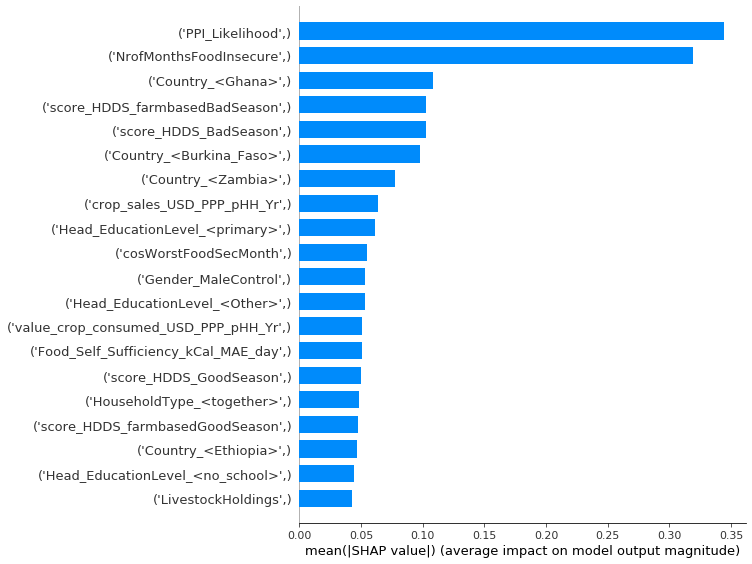

In [12]:
shap.summary_plot(rf_shap_values, tester, plot_type="bar")

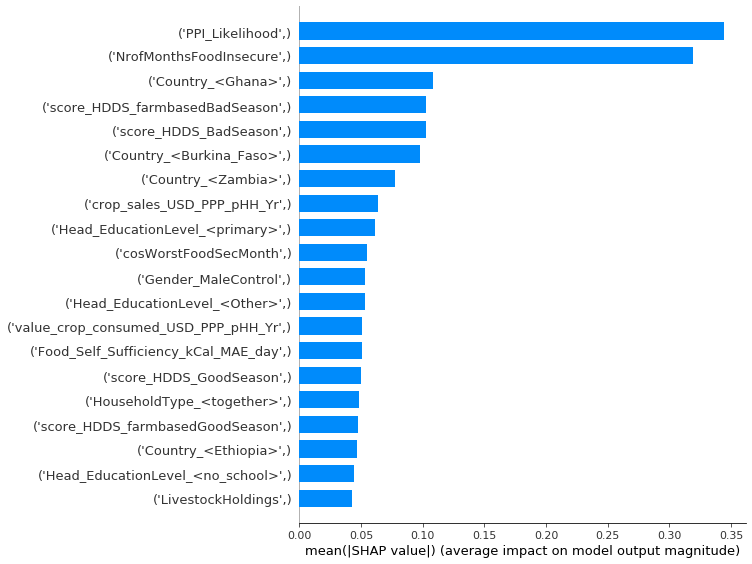

In [18]:
shap.summary_plot(rf_shap_values, tester, plot_type="bar")

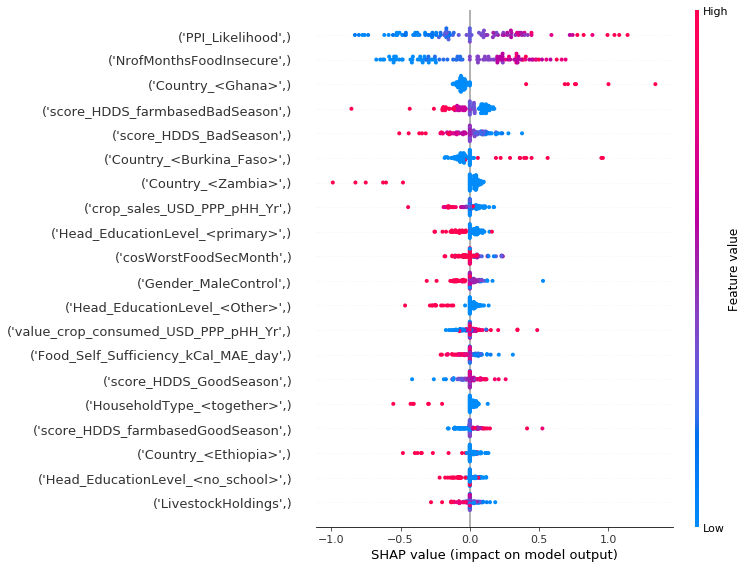

In [20]:
shap.summary_plot(rf_shap_values, tester) 
# contribution_threshold=0.1

In [19]:
#shap.summary_plot(rf_shap_values, tester, plot_type="bar").shapely_home_parallax p {
#    font-size: 28px;
#}

shap.plot.summary.wrap2(rf_shap_values, tester) +
        ggplot2::theme(axis.text.y = element_text(size = 20))

SyntaxError: ignored

In [14]:
tester.shape

(50, 89)

In [15]:
clf_svc.score(test, y_test)

0.6592028660994178